In [2]:
from PIL import Image #Libreria PILLOW
import numpy as np    #Libreria NUMPY
import matplotlib.pyplot as plt #Libreria Matplotlib
%matplotlib inline

## Funciones definidas en TP1

In [3]:
def im_to_YIQ(im):
    im_norm= im/256
    mat_a_YIQ= np.array([[0.299,0.587,0.114],[0.595716,-0.274453,-0.321263],[0.211456,-0.522591,0.311135]])
    im_yiq= np.dot(im_norm, mat_a_YIQ.T)
    return im_yiq

def yiq_coef(im, alpha, beta):
    coe= [alpha,beta,beta]
    im_yiq_coef= im*coe
    #Clampeo Y
    im_yiq_coef[:,:,0][im_yiq_coef[:,:,0]>1] = 1
    #Clampeo I
    im_yiq_coef[:,:,1][im_yiq_coef[:,:,1]>0.5957] = 0.5957
    im_yiq_coef[:,:,1][im_yiq_coef[:,:,1]<(-0.5957)] = (-0.5957)
    #Clampeo Q
    im_yiq_coef[:,:,2][im_yiq_coef[:,:,2]>0.5226] = 0.5226
    im_yiq_coef[:,:,2][im_yiq_coef[:,:,2]<(-0.5226)] =( -0.5226)
    
    return im_yiq_coef


def im_to_RGB(im):
    mat_a_RGB= np.array([[1,0.9663,0.6210],[1,-0.2721,-0.6474],[1,-1.1070,1.7046]])
    im_RGB= np.dot(im, mat_a_RGB.T)
    im_RGB*= 255
    #Clampeo RGB
    im_RGB[im_RGB>255]= 255
    im_RGB[im_RGB<0]= 0
    
    return im_RGB.astype(np.uint8)
 
def show_two_im(a, b, text):
    im1= Image.fromarray(a)
    im2= Image.fromarray(b)
    plt.subplot(121), plt.imshow(im1)
    plt.title("Original")

    plt.subplot(122), plt.imshow(im2)
    plt.title(text)

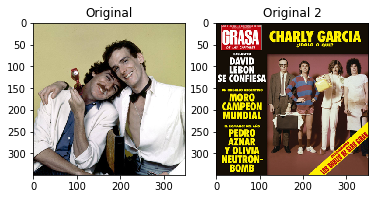

In [4]:
im= Image.open("spinetta.jpg")
im1 = im.resize((350, 350)) 
a1= np.asarray(im1)

im= Image.open("grasa.jpg")
im2 = im.resize((350, 350)) 
a2= np.asarray(im2)

show_two_im(a1,a2, "Original 2")

## Suma RGB clampeada

Text(0.5, 1.0, 'Suma RGB clampeada')

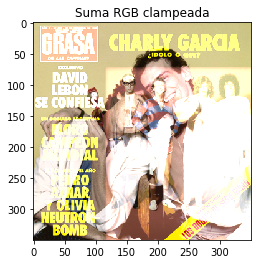

In [5]:
sum_rgb_clamp= np.zeros(a1.shape, dtype="int16")
sum_rgb_clamp+=a1
sum_rgb_clamp+=a2
#Clampeo los valores mayores a 255
sum_rgb_clamp[sum_rgb_clamp>255]=255 

plt.imshow(sum_rgb_clamp)
plt.title("Suma RGB clampeada")

## Suma RGB Promediada

Text(0.5, 1.0, 'Suma RGB Promediada')

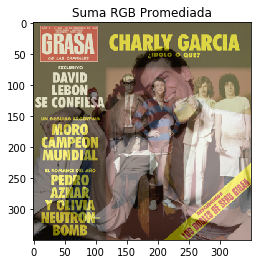

In [6]:
sum_rgb_prom= a1*0.5 +a2*0.5
plt.imshow(sum_rgb_prom.astype("uint8"))
plt.title("Suma RGB Promediada")

## Suma YIQ clampeada

Text(0.5, 1.0, 'Suma YIQ Clampeada')

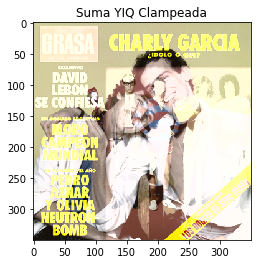

In [7]:
a1_yiq= im_to_YIQ(a1)
a2_yiq= im_to_YIQ(a2)
#SUMO
sum_yiq_clam= np.zeros(a1_yiq.shape)
sum_yiq_clam[:,:,0]= a1_yiq[:,:,0] +a2_yiq[:,:,0]
sum_yiq_clam[sum_yiq_clam[:,:,0]>1]=1
sum_yiq_clam[:,:,1]= (a1_yiq[:,:,0]*a1_yiq[:,:,1] +a2_yiq[:,:,0]*a2_yiq[:,:,1])/(a1_yiq[:,:,0] +a2_yiq[:,:,0])
sum_yiq_clam[:,:,2]= (a1_yiq[:,:,0]*a1_yiq[:,:,2] +a2_yiq[:,:,0]*a2_yiq[:,:,2])/(a1_yiq[:,:,0] +a2_yiq[:,:,0])
#Clampeo los valores YIQ
sum_yiq_clam[sum_yiq_clam[:,:,0]>1]=1
sum_yiq_clam[sum_yiq_clam[:,:,1]>0.5957]=0.5957
sum_yiq_clam[sum_yiq_clam[:,:,1]<-0.5957]=-0.5957
sum_yiq_clam[sum_yiq_clam[:,:,2]>0.5226]=0.5226
sum_yiq_clam[sum_yiq_clam[:,:,2]<-0.5226]=-0.5226
sum_yiq_clamp_rgb= im_to_RGB(sum_yiq_clam)
plt.imshow(sum_yiq_clamp_rgb.astype(np.uint8))
plt.title("Suma YIQ Clampeada")

## Suma YIQ promediada

Text(0.5, 1.0, 'Suma YIQ Promediado')

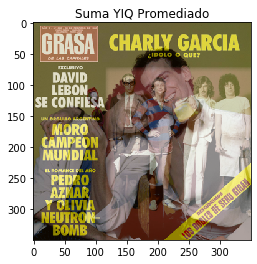

In [8]:
#SUMA
sum_yiq_prom= np.zeros(a1_yiq.shape)
sum_yiq_prom[:,:,0]= a1_yiq[:,:,0]*0.5 +a2_yiq[:,:,0]*0.5
sum_yiq_prom[:,:,1]= (a1_yiq[:,:,0]*a1_yiq[:,:,1] +a2_yiq[:,:,0]*a2_yiq[:,:,1])/(a1_yiq[:,:,0] +a2_yiq[:,:,0])
sum_yiq_prom[:,:,2]= (a1_yiq[:,:,0]*a1_yiq[:,:,2] +a2_yiq[:,:,0]*a2_yiq[:,:,2])/(a1_yiq[:,:,0] +a2_yiq[:,:,0])
#Clampeo los valores YIQ
sum_yiq_prom[sum_yiq_prom[:,:,0]>1]=1
sum_yiq_prom[sum_yiq_prom[:,:,1]>0.5957]=0.5957
sum_yiq_prom[sum_yiq_prom[:,:,1]<-0.5957]=-0.5957
sum_yiq_prom[sum_yiq_prom[:,:,2]>0.5226]=0.5226
sum_yiq_prom[sum_yiq_prom[:,:,2]<-0.5226]=-0.5226
#Vuelvo al espacio RGB
sum_yiq_prom_rgb= im_to_RGB(sum_yiq_prom)
#Convierto de float a uint8 para poder representar la imagen
plt.imshow(sum_yiq_prom_rgb.astype(np.uint8))
plt.title("Suma YIQ Promediado")

## Suma "if ligther"

Text(0.5, 1.0, 'Suma YIQ if ligther')

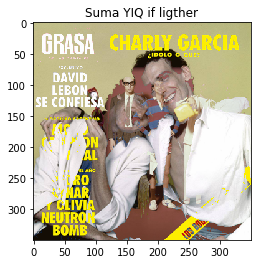

In [9]:
#Sumo
sum_yiq_ifligther= np.zeros(a1_yiq.shape)
for x in range(sum_yiq_ifligther.shape[0]):
    for y in range(sum_yiq_ifligther.shape[1]):
        if a1_yiq[x,y,0]>=a2_yiq[x,y,0]:
            sum_yiq_ifligther[x,y,0]=  a1_yiq[x,y,0]
            sum_yiq_ifligther[x,y,1]=  a1_yiq[x,y,1]
            sum_yiq_ifligther[x,y,2]=  a1_yiq[x,y,2]
        else:
            sum_yiq_ifligther[x,y,0]=  a2_yiq[x,y,0]
            sum_yiq_ifligther[x,y,1]=  a2_yiq[x,y,1]
            sum_yiq_ifligther[x,y,2]=  a2_yiq[x,y,2]
            
#Clampeo los valores YIQ
sum_yiq_ifligther[sum_yiq_ifligther[:,:,0]>1]=1
sum_yiq_ifligther[sum_yiq_ifligther[:,:,1]>0.5957]=0.5957
sum_yiq_ifligther[sum_yiq_ifligther[:,:,1]<-0.5957]=-0.5957
sum_yiq_ifligther[sum_yiq_ifligther[:,:,2]>0.5226]=0.5226
sum_yiq_ifligther[sum_yiq_ifligther[:,:,2]<-0.5226]=-0.5226
#Vuelvo al espacio RGB
sum_yiq_ifligther_rgb= im_to_RGB(sum_yiq_ifligther)
#Grafico
plt.imshow(sum_yiq_ifligther_rgb.astype(np.uint8))
plt.title("Suma YIQ if ligther")

## Cuasi Resta RGB Clampeada

Text(0.5, 1.0, 'res RGB clampeada')

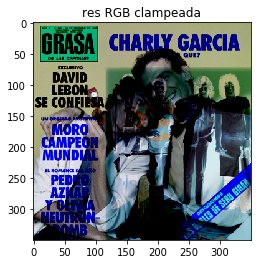

In [10]:
#Cuasi Resta RGB clampeada
res_rgb_clamp= np.zeros(a1.shape, dtype="int16")
res_rgb_clamp+=a1
res_rgb_clamp-=a2
#Clampeo
res_rgb_clamp[res_rgb_clamp<0]=0
#Grafico
plt.imshow(res_rgb_clamp)
plt.title("res RGB clampeada")

## Cuasi Resta RGB promediada

Text(0.5, 1.0, 'Resta RGB Promedida')

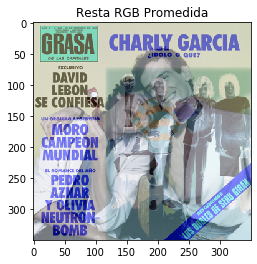

In [11]:
#Cuasi resta promediada
res_rgb_prom= np.zeros(a1.shape, dtype="int16")
res_rgb_prom= a1*0.5-a2*0.5 +128
#Clampeo
res_rgb_prom[res_rgb_prom<0]=0
#Grafico
plt.imshow(res_rgb_prom.astype("uint8"))
plt.title("Resta RGB Promedida")

## Cuasi resta YIQ clampeada

Text(0.5, 1.0, 'Resta YIQ Clampeada')

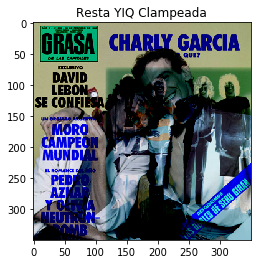

In [12]:
#Cuasi resta YIQ clampeada
res_yiq_clam= np.zeros(a1.shape, dtype="float64")
res_yiq_clam+= a1_yiq
res_yiq_clam-= a2_yiq
#Clampeo valores YIQ
res_yiq_clam[res_yiq_clam[:,:,0]>1]=1
res_yiq_clam[res_yiq_clam[:,:,1]>0.5957]=0.5957
res_yiq_clam[res_yiq_clam[:,:,1]<-0.5957]=-0.5957
res_yiq_clam[res_yiq_clam[:,:,2]>0.5226]=0.5226
res_yiq_clam[res_yiq_clam[:,:,2]<-0.5226]=-0.5226
#Vuelvo al espacio RGB
res_yiq_clam_rgb_bytes= im_to_RGB(res_yiq_clam)
#Grafico
plt.imshow(res_yiq_clam_rgb_bytes.astype("uint8"))
plt.title("Resta YIQ Clampeada")

## Cuasi resta YIQ promediada

Text(0.5, 1.0, 'Resta YIQ Promediada')

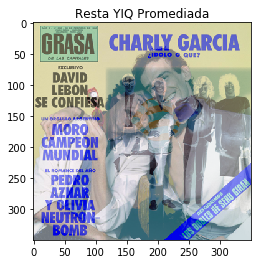

In [13]:
#Cuasi resta YIQ promediada
res_yiq_prom= np.zeros(a1.shape, dtype="float64")
res_yiq_prom[:,:,0]= a1_yiq[:,:,0]*0.5 -a2_yiq[:,:,0]*0.5 + 0.5
res_yiq_prom[res_yiq_prom[:,:,0]>1]=1
res_yiq_prom[:,:,1]= (a1_yiq[:,:,0]*a1_yiq[:,:,1] -a2_yiq[:,:,0]*a2_yiq[:,:,1])/(a1_yiq[:,:,0] +a2_yiq[:,:,0])
res_yiq_prom[:,:,2]= (a1_yiq[:,:,0]*a1_yiq[:,:,2] -a2_yiq[:,:,0]*a2_yiq[:,:,2])/(a1_yiq[:,:,0] +a2_yiq[:,:,0])
#Clampeo los valores YIQ
res_yiq_prom[res_yiq_prom[:,:,0]>1]=1
res_yiq_prom[res_yiq_prom[:,:,1]>0.5957]=0.5957
res_yiq_prom[res_yiq_prom[:,:,1]<-0.5957]=-0.5957
res_yiq_prom[res_yiq_prom[:,:,2]>0.5226]=0.5226
res_yiq_prom[res_yiq_prom[:,:,2]<-0.5226]=-0.5226
#Vuelvo al espacio RGB
res_yiq_prom_rgb_bytes= im_to_RGB(res_yiq_prom)
#Grafico
plt.imshow(res_yiq_prom_rgb_bytes.astype("uint8"))
plt.title("Resta YIQ Promediada")

## Cuasi resta YIQ if darker

Text(0.5, 1.0, 'Resta YIQ if darker')

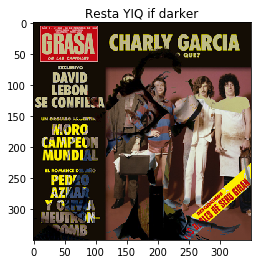

In [14]:
#Cuasi resta YIQ if darker
res_yiq_ifdarker= np.zeros(a1.shape, dtype="float64")
for x in range(res_yiq_ifdarker.shape[0]):
    for y in range(res_yiq_ifdarker.shape[1]):
        if a1_yiq[x,y,0]<a2_yiq[x,y,0]:
            res_yiq_ifdarker[x,y,0]=  a1_yiq[x,y,0]
            res_yiq_ifdarker[x,y,1]=  a1_yiq[x,y,1]
            res_yiq_ifdarker[x,y,2]=  a1_yiq[x,y,2]
        else:
            res_yiq_ifdarker[x,y,0]=  a2_yiq[x,y,0]
            res_yiq_ifdarker[x,y,1]=  a2_yiq[x,y,1]
            res_yiq_ifdarker[x,y,2]=  a2_yiq[x,y,2]
#Clampeo los valores YIQ
res_yiq_ifdarker[res_yiq_ifdarker[:,:,0]>1]=1
res_yiq_ifdarker[res_yiq_ifdarker[:,:,1]>0.5957]=0.5957
res_yiq_ifdarker[res_yiq_ifdarker[:,:,1]<-0.5957]=-0.5957
res_yiq_ifdarker[res_yiq_ifdarker[:,:,2]>0.5226]=0.5226
res_yiq_ifdarker[res_yiq_ifdarker[:,:,2]<-0.5226]=-0.5226
#Vuelvo al espacio RGB
res_yiq_ifdarker_rgb_bytes= im_to_RGB(res_yiq_ifdarker)
plt.imshow(res_yiq_ifdarker_rgb_bytes.astype("uint8"))
plt.title("Resta YIQ if darker")

## Definición de funciones
Para simplificar la codificación se definen 8 funciones para las operaciones artiméticas de suma y resta

In [41]:
#OPERACIONES ARITMETICAS
    
def sum_rgb_clamp(a1, a2):
    sum_rgb_clamp= np.zeros(a1.shape, dtype="int16")
    sum_rgb_clamp+=a1
    sum_rgb_clamp+=a2
    sum_rgb_clamp[sum_rgb_clamp>255]=255
    return sum_rgb_clamp.astype(np.uint8)

def sum_rgb_prom(a1,a2):
    sum_rgb_prom= a1*0.5 +a2*0.5
    return sum_rgb_prom.astype(np.uint8)

def sum_yiq_clamp(a1, a2):
    a1_yiq= im_to_YIQ(a1)
    a2_yiq= im_to_YIQ(a2)
    #SUMO
    sum_yiq_clam= np.zeros(a1_yiq.shape)
    sum_yiq_clam[:,:,0]= a1_yiq[:,:,0] +a2_yiq[:,:,0]
    sum_yiq_clam[sum_yiq_clam[:,:,0]>1]=1
    sum_yiq_clam[:,:,1]= (a1_yiq[:,:,0]*a1_yiq[:,:,1] +a2_yiq[:,:,0]*a2_yiq[:,:,1])/(a1_yiq[:,:,0] +a2_yiq[:,:,0])
    sum_yiq_clam[:,:,2]= (a1_yiq[:,:,0]*a1_yiq[:,:,2] +a2_yiq[:,:,0]*a2_yiq[:,:,2])/(a1_yiq[:,:,0] +a2_yiq[:,:,0])
    #Clampeo los valores YIQ
    sum_yiq_clam[sum_yiq_clam[:,:,0]>1]=1
    sum_yiq_clam[sum_yiq_clam[:,:,1]>0.5957]=0.5957
    sum_yiq_clam[sum_yiq_clam[:,:,1]<-0.5957]=-0.5957
    sum_yiq_clam[sum_yiq_clam[:,:,2]>0.5226]=0.5226
    sum_yiq_clam[sum_yiq_clam[:,:,2]<-0.5226]=-0.5226
    sum_yiq_clamp_rgb= im_to_RGB(sum_yiq_clam)
    return sum_yiq_clamp_rgb.astype(np.uint8)

def sum_yiq_prom(a1, a2):
    a1_yiq= im_to_YIQ(a1)
    a2_yiq= im_to_YIQ(a2)
    #SUMO
    sum_yiq_prom= np.zeros(a1_yiq.shape)
    sum_yiq_prom[:,:,0]= a1_yiq[:,:,0]*0.5 +a2_yiq[:,:,0]*0.5
    sum_yiq_prom[:,:,1]= (a1_yiq[:,:,0]*a1_yiq[:,:,1] +a2_yiq[:,:,0]*a2_yiq[:,:,1])/(a1_yiq[:,:,0] +a2_yiq[:,:,0])
    sum_yiq_prom[:,:,2]= (a1_yiq[:,:,0]*a1_yiq[:,:,2] +a2_yiq[:,:,0]*a2_yiq[:,:,2])/(a1_yiq[:,:,0] +a2_yiq[:,:,0])
    #Clampeo los valores YIQ
    sum_yiq_prom[sum_yiq_prom[:,:,0]>1]=1
    sum_yiq_prom[sum_yiq_prom[:,:,1]>0.5957]=0.5957
    sum_yiq_prom[sum_yiq_prom[:,:,1]<-0.5957]=-0.5957
    sum_yiq_prom[sum_yiq_prom[:,:,2]>0.5226]=0.5226
    sum_yiq_prom[sum_yiq_prom[:,:,2]<-0.5226]=-0.5226
    #Vuelvo al espacio RGB
    sum_yiq_prom_rgb= im_to_RGB(sum_yiq_prom)
    #Convierto de float a uint8 para poder representar la imagen
    return sum_yiq_prom_rgb.astype(np.uint8)

def sum_ifligther(a1, a2):
    a1_yiq= im_to_YIQ(a1)
    a2_yiq= im_to_YIQ(a2)
    #Sumo
    sum_yiq_ifligther= np.zeros(a1_yiq.shape)
    for x in range(sum_yiq_ifligther.shape[0]):
        for y in range(sum_yiq_ifligther.shape[1]):
            if a1_yiq[x,y,0]>=a2_yiq[x,y,0]:
                sum_yiq_ifligther[x,y,0]=  a1_yiq[x,y,0]
                sum_yiq_ifligther[x,y,1]=  a1_yiq[x,y,1]
                sum_yiq_ifligther[x,y,2]=  a1_yiq[x,y,2]
            else:
                sum_yiq_ifligther[x,y,0]=  a2_yiq[x,y,0]
                sum_yiq_ifligther[x,y,1]=  a2_yiq[x,y,1]
                sum_yiq_ifligther[x,y,2]=  a2_yiq[x,y,2]

    #Clampeo los valores YIQ
    sum_yiq_ifligther[sum_yiq_ifligther[:,:,0]>1]=1
    sum_yiq_ifligther[sum_yiq_ifligther[:,:,1]>0.5957]=0.5957
    sum_yiq_ifligther[sum_yiq_ifligther[:,:,1]<-0.5957]=-0.5957
    sum_yiq_ifligther[sum_yiq_ifligther[:,:,2]>0.5226]=0.5226
    sum_yiq_ifligther[sum_yiq_ifligther[:,:,2]<-0.5226]=-0.5226
    #Vuelvo al espacio RGB
    sum_yiq_ifligther_rgb= im_to_RGB(sum_yiq_ifligther)
    #Grafico
    return sum_yiq_ifligther_rgb.astype(np.uint8) 

def res_rgb_clamp(a1, a2):
    #Cuasi Resta RGB clampeada
    res_rgb_clamp= np.zeros(a1.shape, dtype="int16")
    res_rgb_clamp+=a1
    res_rgb_clamp-=a2
    #Clampeo
    res_rgb_clamp[res_rgb_clamp<0]=0
    
    return res_rgb_clamp

def res_rgb_prom(a1, a2):
    #Cuasi resta promediada
    res_rgb_prom= np.zeros(a1.shape, dtype="int16")
    res_rgb_prom= a1*0.5-a2*0.5 +128
    #Clampeo
    res_rgb_prom[res_rgb_prom<0]=0
    
    return res_rgb_prom.astype("uint8")

def res_yiq_clamp(a1, a2):
    a1_yiq= im_to_YIQ(a1)
    a2_yiq= im_to_YIQ(a2)
    #Cuasi resta YIQ clampeada
    res_yiq_clam= np.zeros(a1.shape, dtype="float64")
    res_yiq_clam+= a1_yiq
    res_yiq_clam-= a2_yiq
    #Clampeo valores YIQ
    res_yiq_clam[res_yiq_clam[:,:,0]>1]=1
    res_yiq_clam[res_yiq_clam[:,:,1]>0.5957]=0.5957
    res_yiq_clam[res_yiq_clam[:,:,1]<-0.5957]=-0.5957
    res_yiq_clam[res_yiq_clam[:,:,2]>0.5226]=0.5226
    res_yiq_clam[res_yiq_clam[:,:,2]<-0.5226]=-0.5226
    #Vuelvo al espacio RGB
    res_yiq_clam_rgb_bytes= im_to_RGB(res_yiq_clam)
    
    return res_yiq_clam_rgb_bytes.astype("uint8")
   
def res_yiq_prom(a1, a2):
    a1_yiq= im_to_YIQ(a1)
    a2_yiq= im_to_YIQ(a2)   
    #Cuasi resta YIQ promediada
    res_yiq_prom= np.zeros(a1.shape, dtype="float64")
    res_yiq_prom[:,:,0]= a1_yiq[:,:,0]*0.5 -a2_yiq[:,:,0]*0.5 + 0.5
    res_yiq_prom[res_yiq_prom[:,:,0]>1]=1
    res_yiq_prom[:,:,1]= (a1_yiq[:,:,0]*a1_yiq[:,:,1] -a2_yiq[:,:,0]*a2_yiq[:,:,1])/(a1_yiq[:,:,0] +a2_yiq[:,:,0])
    res_yiq_prom[:,:,2]= (a1_yiq[:,:,0]*a1_yiq[:,:,2] -a2_yiq[:,:,0]*a2_yiq[:,:,2])/(a1_yiq[:,:,0] +a2_yiq[:,:,0])
    #Clampeo los valores YIQ
    res_yiq_prom[res_yiq_prom[:,:,0]>1]=1
    res_yiq_prom[res_yiq_prom[:,:,1]>0.5957]=0.5957
    res_yiq_prom[res_yiq_prom[:,:,1]<-0.5957]=-0.5957
    res_yiq_prom[res_yiq_prom[:,:,2]>0.5226]=0.5226
    res_yiq_prom[res_yiq_prom[:,:,2]<-0.5226]=-0.5226
    #Vuelvo al espacio RGB
    res_yiq_prom_rgb_bytes= im_to_RGB(res_yiq_prom)
    
    return res_yiq_prom_rgb_bytes.astype("uint8")

def res_ifdarker(a1, a2):
    a1_yiq= im_to_YIQ(a1)
    a2_yiq= im_to_YIQ(a2) 
    #Cuasi resta YIQ if darker
    res_yiq_ifdarker= np.zeros(a1.shape, dtype="float64")
    for x in range(res_yiq_ifdarker.shape[0]):
        for y in range(res_yiq_ifdarker.shape[1]):
            if a1_yiq[x,y,0]<a2_yiq[x,y,0]:
                res_yiq_ifdarker[x,y,0]=  a1_yiq[x,y,0]
                res_yiq_ifdarker[x,y,1]=  a1_yiq[x,y,1]
                res_yiq_ifdarker[x,y,2]=  a1_yiq[x,y,2]
            else:
                res_yiq_ifdarker[x,y,0]=  a2_yiq[x,y,0]
                res_yiq_ifdarker[x,y,1]=  a2_yiq[x,y,1]
                res_yiq_ifdarker[x,y,2]=  a2_yiq[x,y,2]
    #Clampeo los valores YIQ
    res_yiq_ifdarker[res_yiq_ifdarker[:,:,0]>1]=1
    res_yiq_ifdarker[res_yiq_ifdarker[:,:,1]>0.5957]=0.5957
    res_yiq_ifdarker[res_yiq_ifdarker[:,:,1]<-0.5957]=-0.5957
    res_yiq_ifdarker[res_yiq_ifdarker[:,:,2]>0.5226]=0.5226
    res_yiq_ifdarker[res_yiq_ifdarker[:,:,2]<-0.5226]=-0.5226
    #Vuelvo al espacio RGB
    res_yiq_ifdarker_rgb_bytes= im_to_RGB(res_yiq_ifdarker)
    return res_yiq_ifdarker_rgb_bytes.astype("uint8")
 
def show_three_im(a, b, c, text):
    im1= Image.fromarray(a)
    im2= Image.fromarray(b)
    im3= Image.fromarray(c)
    plt.subplot(131), plt.imshow(im1)
    plt.title("Original 1")

    plt.subplot(132), plt.imshow(im2)
    plt.title("Original 2")
    
    plt.subplot(133), plt.imshow(im3)
    plt.title(text)

# FIN